In [56]:
#!git clone https://github.com/dorajam/RecSys-Workshop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shapefile
import random
import sys
import os 
import utilities as utl

In [67]:
path = 'RecSys-Workshop/tutorials/'
os.chdir(path)
import utilities as utl

In [2]:
### geography
path1 = "G:/My Drive/2020/sumo/"
joined_tazct = shapefile.Reader(path1+'joined_taz_ct_Seattle.shp')
joined_tazct = pd.DataFrame(joined_tazct.records())

In [3]:
#demographic info
path2 = 'G:/My Drive/2020/Bias/model/'
rawd = pd.read_csv(path2+'data_stage1_v1.csv')
model_est = pd.read_csv(path2+'poi_res_v32.csv')

In [4]:
#gps info
path3 = path1+'sumo_simulation_2020/'
vehpoi = pd.read_csv(path3+'veh_latlon.csv')

In [5]:
joined_tazct.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,445,033,King,53,033,990100,53033990100,9901,Census Tract 9901,G5020,S,0,239607794,+47.5106478,-122.4154213
1,449,033,King,53,033,990100,53033990100,9901,Census Tract 9901,G5020,S,0,239607794,+47.5106478,-122.4154213
2,478,033,King,53,033,990100,53033990100,9901,Census Tract 9901,G5020,S,0,239607794,+47.5106478,-122.4154213
3,581,033,King,53,033,008600,53033008600,86,Census Tract 86,G5020,S,711360,0,+47.6071015,-122.3166893
4,532,033,King,53,033,008500,53033008500,85,Census Tract 85,G5020,S,474211,0,+47.6051125,-122.3249464


In [6]:
vehpoi.head()

,time,vehicle id,x,y,angle,type,pos,lane,slope
0,14460.0,104,2380.13,4937.17,44.48,DEFAULT_VEHTYPE,5.1,6515422#0_0,0.0
1,14460.0,109,2361.65,4938.61,310.53,DEFAULT_VEHTYPE,5.1,-163419184#1_0,0.0
2,14460.0,123,2589.48,5001.84,310.58,DEFAULT_VEHTYPE,5.1,-462696721#1_0,0.0
3,14460.0,202,2940.04,5393.02,220.79,DEFAULT_VEHTYPE,5.1,22927960#2_0,0.0
4,14460.0,212,3166.43,5406.09,148.07,DEFAULT_VEHTYPE,5.1,-22927955#3_0,0.0


In [7]:
#check joined taz and census tract
print('current joined shape contains census tract id include:')
print(np.unique(joined_tazct[6]))
#selected census tract in downtown Seattle
downtown_Seattle = ['53033008500','53033008300','53033008200','53033008100','53033008002',\
                    '53033008001','53033007300','53033007200']
print('Seattle census tract:')
print(downtown_Seattle)

#check taz in current Census tract
tazs = joined_tazct[0]
census_id = joined_tazct[6]
ct_taz_ids = {}
for i in range(len(tazs)):
    if census_id[i] in downtown_Seattle:
        if census_id[i] not in ct_taz_ids:
            ct_taz_ids[census_id[i]] = []
            ct_taz_ids[census_id[i]].append(tazs[i])
        else:
            ct_taz_ids[census_id[i]].append(tazs[i])
print('current taz in downtown Seattle')
print(ct_taz_ids)

current joined shape contains census tract id include:
['53033007200' '53033007300' '53033008001' '53033008002' '53033008100'
 '53033008200' '53033008300' '53033008400' '53033008500' '53033008600'
 '53033990100']
Seattle census tract:
['53033008500', '53033008300', '53033008200', '53033008100', '53033008002', '53033008001', '53033007300', '53033007200']
current taz in downtown Seattle
{'53033008500': [532, 538, 539, 543, 544, 545, 546, 577, 578, 579, 609], '53033008300': [506, 507, 517, 570, 571, 572, 573], '53033008200': [502, 503, 504, 505, 513, 514, 515, 516, 523, 524, 525, 531], '53033008100': [479, 498, 499, 500, 501, 508, 509, 510, 511, 512, 518, 519, 520, 521, 522, 526, 527, 528, 529, 530, 533, 534, 535, 536, 537, 540, 541, 542], '53033008002': [457, 458, 459, 467, 468, 469, 470, 480, 481, 482], '53033008001': [446, 447, 448, 450, 451, 452, 453, 454, 460, 461], '53033007300': [475, 476, 477, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497], '53033007200': [455, 4

In [8]:
#read gps file
veh_od = pd.read_csv(path1+'sumo_simulation_2020/veh_od.csv')
veh_od.head()

,vehicle id,depart_time,depart_lane,depart_speed,fromTaz,toTaz,arrival_time
0,653,14640.0,1,14.69,515,515,14820.0
1,241,14580.0,0,7.96,480,499,15360.0
2,469,15300.0,2,15.31,503,503,15600.0
3,824,15120.0,0,12.40,544,544,15660.0
4,544,15360.0,0,12.90,509,480,15780.0


In [9]:
#check if current taz id matches sumo taz settings
taz = np.unique(veh_od[' fromTaz'])
for i in list(taz):
    if i not in list(tazs):
        print(i)
#all ids in taz

#check csv colname
print(veh_od.columns)

Index(['vehicle id', ' depart_time', ' depart_lane', ' depart_speed',
       ' fromTaz', ' toTaz', ' arrival_time'],
      dtype='object')


In [10]:
#select useful columns and useful geoid
rawd = rawd[['pop', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9', 'g10', 'g11', 'g12',\
      'g13', 'g14', 'g15', 'g16', 'g17','g18','GEOID10','Count_']]
rawd_ct = rawd[rawd.GEOID10.isin(downtown_Seattle)]

pop_per = pd.DataFrame()
for i in range(18):
    pop_per['prob_g'+str(i+1)] = rawd_ct['g'+str(i+1)]/rawd_ct['pop']
pop_per['GEOID10'] = rawd_ct['GEOID10']

In [11]:
#check vehicle counts at each taz, used for demographic character assignment
vehintaz = veh_od.groupby(' fromTaz')['vehicle id'].agg(['count']).reset_index()

#print(len(veh_od['vehicle id']))
#print(len(np.unique(veh_od['vehicle id'])))
#thus in this case we know that vehicle doesn't have multi origins

#add census id
ct_id = []
for i in range(len(vehintaz[' fromTaz'])):
    for j in ct_taz_ids:
        if vehintaz[' fromTaz'][i] in ct_taz_ids[j]:
            ct_id.append(j)
vehintaz['within_census_id'] = ct_id

vehintaz.groupby('within_census_id')['count'].agg(['sum']).reset_index()

,within_census_id,sum
0,53033007200,7537
1,53033007300,8406
2,53033008001,7136
3,53033008002,7840
4,53033008100,22251
5,53033008200,17076
6,53033008300,1454
7,53033008500,2692


In [12]:
vehintaz

,fromTaz,count,within_census_id
0,446,491,53033008001
1,447,867,53033008001
2,448,839,53033008001
3,450,128,53033008001
4,451,1166,53033008001
...,...,...,...
93,541,532,53033008100
94,542,126,53033008100
95,543,44,53033008500
96,544,824,53033008500


In [13]:
def changecolname(dt, namechar):
    colname = list(dt.columns)
    colname[0] = namechar
    dt.columns = colname
    return(dt)

def reassign_dt(ods, per):
    if ods.shape == per.shape:
        ods_per = np.round((ods*per),0)
        ods_decimal = ods*per
        samples = np.sum(np.round(ods*per,0), axis=1)
    else:
        ods_per = np.round(np.matmul(ods, per),0)
        ods_decimal = np.matmul(ods, per)
        samples = np.sum(np.round(np.matmul(ods, per),0), axis=1)
    compare_num = [0.4, 0.3, 0.2, 0.1]
    for ids in range(len(samples)):
        #print(ids)
        if samples[ids]<ods[ids][0]:
            ori_deci = list(ods_decimal[ids])
            samples_decimal = list(-np.sort(-ods_decimal[ids]))
            #print('ori_deci', ori_deci)
            #print('samples_dec', samples_decimal)
            for i in compare_num:
                for num in samples_decimal:
                    res = num-int(num)
                    if res<(i+0.1) and res>=i:
                        ods_per[ids][ori_deci.index(num)] = ods_per[ids][ori_deci.index(num)] + 1
                    if ods_per[ids].sum() == ods[ids][0]:
                        break
                if ods_per[ids].sum() == ods[ids][0]:
                    break
        elif samples[ids]>ods[ids][0]:
            ori_deci = list(ods_decimal[ids])
            samples_decimal = list(-np.sort(-ods_decimal[ids]))
            #print('ori_deci', ori_deci)
            #print('samples_dec', samples_decimal)
            for i in compare_num:
                for num in samples_decimal:
                    res = num-int(num)
                    if res<(i+0.5) and res>=(i+0.4):
                        ods_per[ids][ori_deci.index(num)] = ods_per[ids][ori_deci.index(num)] - 1
                    if ods_per[ids].sum() == ods[ids][0]:
                        break
                if ods_per[ids].sum() == ods[ids][0]:
                    break
    return(ods_per)

def tidedt(labels, ids, Seattle_Geoid, model_est): 
    index_base = 0
    for i in range(len(Seattle_Geoid)):
        dt = {}
        if i == 0:
            dt['demo_label'] = list(labels[i])
            dt['id'] = ids[i]
            sm, sample_fixed, sample = assign_label(labels[i], ids[i], model_est)
            dt['sm_owner'] = sm
            dt['identified_w.fixedprob'] = sample_fixed
            dt['identified'] = sample
            dt['geoid'] = list([Seattle_Geoid[i]]*len(labels[i]))
            indexlst = list(range(len(labels[i])))
            a = pd.DataFrame(dt, index = indexlst)
            index_base = len(labels[i])
        else:
            dt['demo_label'] = labels[i]
            dt['id'] = ids[i]
            sm, sample_fixed, sample = assign_label(labels[i], ids[i], model_est)
            dt['sm_owner'] = sm
            dt['identified_w.fixedprob'] = sample_fixed
            dt['identified'] = sample
            dt['geoid'] = list([Seattle_Geoid[i]]*len(labels[i]))
            indexlst = list(range(index_base, (len(labels[i])+index_base)))
            b = pd.DataFrame(dt, index=indexlst)
            frames = [a, b] 
            a = pd.concat(frames)  
            index_base = index_base+len(labels[i])
    return(a)          

def assign_label(labels_ct, ids, model_est):
    sm_lb = []
    sample_lbfixed = []
    sample_lb =[]
    for j in range(len(labels_ct)):
        #based on pew research center
        #the percentage of people owning smartphon in U.S is 81%
        #source https://www.pewresearch.org/internet/fact-sheet/mobile/ 
        sm_lb.append(np.random.binomial(1, .81, 1)[0])
        if sm_lb[j] != 0:
            sample_lbfixed.append(np.random.binomial(1, model_est['mean'][labels_ct[j]]*model_est['mean'][18], 1)[0])
            prob = np.random.normal(model_est['mean'][labels_ct[j]], model_est['se_mean'][labels_ct[j]], 1)[0]
            ratio = np.random.normal(model_est['mean'][18], model_est['se_mean'][18], 1)[0]
            sample_lb.append(np.random.binomial(1, prob*ratio, 1)[0])
        else:
            sample_lbfixed.append(0)
            sample_lb.append(0)
    return(sm_lb, sample_lbfixed, sample_lb)
        

rawd = changecolname(rawd, 'index')
model_est = changecolname(model_est, 'para')

rawd.head()
#model_est.head()

,index,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g11,g12,g13,g14,g15,g16,g17,g18,GEOID10,Count_
0,7963,1064,784,805,544,633,1149,74,375,515,...,313,432,58,178,264,43,240,271,53033000100,180
1,7973,675,762,1030,605,575,980,137,193,689,...,297,617,12,148,270,34,306,472,53033000200,189
2,2822,307,346,328,261,163,397,60,106,168,...,132,154,29,50,49,7,112,81,53033000300,70
3,6721,590,745,556,438,626,840,33,370,377,...,348,429,0,194,193,101,576,283,53033000401,130
4,5300,495,322,638,213,312,479,13,408,432,...,201,386,36,166,198,58,403,493,53033000402,123


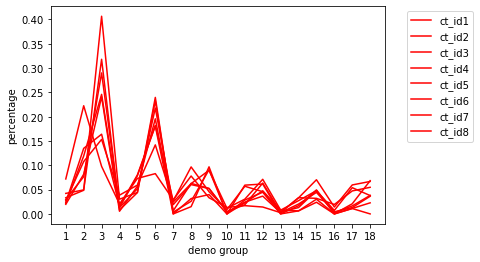

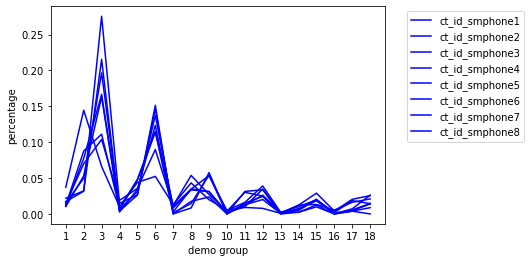

In [43]:
#check demo percenrage in ct and demo percentage for smartphone ownership
a = 1
for i in range(8):
    plt.plot(list(pop_per.iloc[i, :18].values), label= 'ct_id'+str(a), color='r')
    a = a+1

plt.xticks(range(18), range(1,19))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('demo group')
plt.ylabel('percentage')
plt.show()

a = 1
for i in range(8):
    plt.plot(list(pop_per.iloc[i, :18].values*model_est['mean'][:-1]), label= 'ct_id_smphone'+str(a), color='b')
    a = a+1

plt.xticks(range(18), range(1,19))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('demo group')
plt.ylabel('percentage')
plt.show()
#plt.plot(model_est['mean'][:-1], label = 'est')


In [52]:
ct_id = list(pop_per.iloc[:, -1])
#vehintaz
def get_demo_pop(census_id, vehintaz):
    origins = np.array(vehintaz[vehintaz.within_census_id == str(census_id)]['count'])
    origins = origins.reshape(len(origins),1)
    #print(origins)
    demo_per = np.array(pop_per[pop_per.GEOID10 == census_id].iloc[0, :-1])
    demo_per = demo_per.reshape(1, len(demo_per))
    #print(demo_per)
    demo_pop = pd.DataFrame(reassign_dt(origins, demo_per))
    demo_pop['GEOID'] = ct_id[i]
    demo_pop['taz'] = np.array(vehintaz[vehintaz.within_census_id == str(census_id)][' fromTaz'])
    return(demo_pop)

#get the demo group population
for i in range(len(ct_id)):
    if i == 0:
        demo_pop = pd.DataFrame()
        demo_pop = get_demo_pop(ct_id[i], vehintaz)
    else:
        demo_pop2 = get_demo_pop(ct_id[i], vehintaz)
        demo_pop = demo_pop.append(demo_pop2, ignore_index=True)

In [16]:
demo_pop = demo_pop.sort_values(by=['taz'])
veh_od = veh_od.sort_values(by=[' fromTaz'])
tazlst = list(demo_pop['taz'])
demo_labels = []

for tazid in tazlst:
    demolst = list(demo_pop[demo_pop['taz'] == tazid].iloc[0,:-2])
    demo_labellst = []
    for i in range(18):
        demo_labellst.extend(list(np.repeat((i+1), demolst[i])))
    random.shuffle(demo_labellst)
    demo_labels.extend(demo_labellst)

veh_od['demo_label'] = demo_labels

In [17]:
#simulate the smartphone sampling vehicle id
sm_identified = []
prob_mean = model_est['mean'][:-1]
prob_se = model_est['se_mean'][:-1]
r_mean = model_est['mean'][-1:]
r_se = model_est['se_mean'][-1:]

sim_sm_fixed = []
sim_sm = []
for i in demo_labels:
    sim_p = np.random.normal(prob_mean[(i-1)], prob_se[(i-1)], 1)[0]
    sim_r = np.random.normal(r_mean, r_se, 1)[0]
    sim_sm_fixed.append(np.random.binomial(1, prob_mean[(i-1)]*r_mean, 1)[0])
    sim_sm.append(np.random.binomial(1, sim_p*sim_r, 1)[0])

In [18]:
veh_od['sim_sm_fixed'] = sim_sm_fixed
veh_od['sim_sm'] = sim_sm

In [53]:
veh_od

,vehicle id,depart_time,depart_lane,depart_speed,fromTaz,toTaz,arrival_time,demo_label,sim_sm_fixed,sim_sm
52474,38848,75120.0,1,0.00,446,460,91680.0,8,0,0
53652,50836,65040.0,0,12.48,446,528,94080.0,2,0,0
62913,50839,83280.0,1,16.21,446,530,122460.0,6,0,0
56352,50838,83580.0,1,12.61,446,529,100920.0,12,0,0
24422,10089,40260.0,0,12.37,446,464,57780.0,12,0,0
...,...,...,...,...,...,...,...,...,...,...
14775,18256,29820.0,1,15.32,545,488,46020.0,2,0,0
14764,10065,26880.0,0,11.37,545,503,46020.0,9,0,0
67761,10059,25980.0,0,13.19,545,460,146760.0,5,0,0
5911,18268,30180.0,0,12.61,545,534,36720.0,2,0,0


In [19]:
simulated_sm_1 = veh_od[veh_od.sim_sm_fixed==1]
simulated_sm_2 = veh_od[veh_od.sim_sm==1]

In [20]:
sm_count_1 = simulated_sm_1.groupby(' fromTaz')['vehicle id'].agg(['count']).reset_index()
sm_count_2 = simulated_sm_2.groupby(' fromTaz')['vehicle id'].agg(['count']).reset_index()
demo_pop['sim_count1'] = sm_count_1['count']
demo_pop['sim_count2'] = sm_count_2['count']

sm_count_1 = demo_pop.groupby('GEOID')['sim_count1'].agg(['sum']).reset_index()
sm_count_2 = demo_pop.groupby('GEOID')['sim_count2'].agg(['sum']).reset_index()

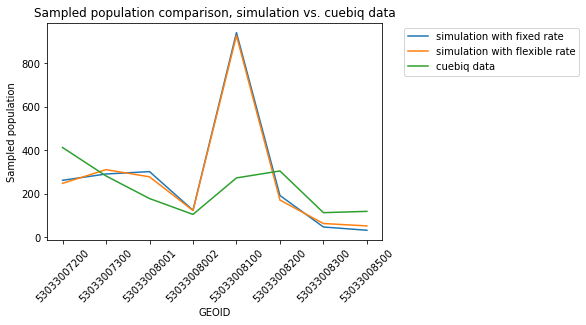

In [21]:
downtown_Seattle.sort()
#check demo percenrage in ct and demo percentage for smartphone ownership
plt.plot(sm_count_1['sum'].values, label = 'simulation with fixed rate')
plt.plot(sm_count_2['sum'].values, label = 'simulation with flexible rate')
plt.plot(rawd_ct['Count_'].values, label = 'cuebiq data')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(8), downtown_Seattle, rotation=45)
plt.xlabel('GEOID')
plt.ylabel('Sampled population')
plt.title('Sampled population comparison, simulation vs. cuebiq data')
plt.show()

In [22]:
print(len(np.unique(simulated_sm_1['vehicle id'])))
print(len(np.unique(simulated_sm_2['vehicle id'])))
print(rawd_ct['Count_'].sum())

2239
2279
1788


In [176]:
#get the time interval for people who use smartphones
def generate_time(sum_ti, time, time_interval):
    selected_time = []
    for i in range(sum_ti):
        selected_time.append(((i+1)*time_interval)*60)
    time_0 = time[0]
    for i in selected_time:
        if i not in time and i >= time_0:
            print('warning, no simulated time available for time: '+ str(i))
    return(selected_time)

#add geo info (i.e., od info) for time interval with no travel demand
def add_rowwithod(add_row, t, veh, od, rate):
    add_row['time'].append(t)
    add_row[' vehicle id'].append(veh)
    add_row[' x'].append(od)
    add_row['identified'].append(np.random.binomial(1, rate, 1)[0])
    for keys in add_row:
        if keys not in ['time', ' vehicle id', ' x', 'identified']:
            add_row[keys].append(None)
    return(add_row)
            
def dgp_stage2(simulated_df, time_interval, sum_ti, sm_rate):
    vehid_sm = list(np.unique(simulated_df['vehicle id']))
    #vehid_sm1 = list(np.unique(simulated_sm_1['vehicle id']))
    #vehid_sm2 = list(np.unique(simulated_sm_2['vehicle id']))

    #trucated data
    selected_vehpoi = vehpoi[vehpoi[' vehicle id'].isin(vehid_sm)]
    #vehpoi_1 = vehpoi[vehpoi[' vehicle id'].isin(vehid_sm1)]
    #vehpoi_2 = vehpoi[vehpoi[' vehicle id'].isin(vehid_sm2)]
    
    #get time
    time = list(np.unique(selected_vehpoi['time']))
    #get simulated time based on data collection
    #e.g., with 10-min/30-min interval
    selected_time = generate_time(sum_ti, time, time_interval)
    selected_vehpoi = selected_vehpoi[selected_vehpoi['time'].isin(selected_time)].sort_values(by=[' vehicle id'])
    
    #create a dict to store users location before traveling
    #notice in sumo, we can only get the geo-info when vehs started to travel
    #thus for specific time (e.g., midnight), when there is no traffic demand, 
    #the geo-info is assumed to be the vehicles origins
    colname = list(selected_vehpoi.columns)
    add_row = {}
    for i in colname:
        add_row[i] = []
    add_row['identified'] = []
    
    identified_lst = []
    vehid_sm = np.unique(selected_vehpoi[' vehicle id'])
    for veh in vehid_sm:
        timelst = list(selected_vehpoi['time'][selected_vehpoi[' vehicle id']==veh])
        origin = simulated_df[' fromTaz'][simulated_df['vehicle id']==veh].values[0]
        dest = simulated_df[' toTaz'][simulated_df['vehicle id']==veh].values[0]
        for i in range(len(selected_time)):
            if selected_time[i] not in timelst:
                try:
                    if selected_time[i]<min(timelst):
                        add_row = add_rowwithod(add_row, selected_time[i], veh, origin, sm_rate[i])
                    elif selected_time[i]>max(timelst):
                        add_row = add_rowwithod(add_row, selected_time[i], veh, dest, sm_rate[i])
                    else:
                        add_row = add_rowwithod(add_row, selected_time[i], veh, None, sm_rate[i])
                except:
                    print(veh)
            else:
                identified_lst.append(np.random.binomial(1, sm_rate[i], 1)[0])
    
    selected_vehpoi['identified'] = 0    
    selected_vehpoi['identified'] = identified_lst    
    selected_vehpoi.append(add_row, ignore_index = True)
    
    return(selected_vehpoi)

In [180]:
#simulate collection based on each time
vehpoi.head()
#sm_time: simulated data collection sampling rate at each time
#using hp04042017.csv (the real cuebiq data as the rate)
path4 = path2+'../data-processing/'
sm_rate = pd.read_csv(path4+'hp04042017.csv')
sm_rate = list(sm_rate[list(sm_rate.columns)[-2]])
time_interval = int(24*60/len(sm_rate))
#total number of time intervals
sum_ti = len(sm_rate)

sm_df1 = dgp_stage2(simulated_sm_1, time_interval, sum_ti, sm_rate)
sm_df2 = dgp_stage2(simulated_sm_2, time_interval, sum_ti, sm_rate)

In [182]:
sm_df1.head(10)

,time,vehicle id,x,y,angle,type,pos,lane,slope,identified
1103776,33600.0,27,2432.39,5414.25,89.90,DEFAULT_VEHTYPE,5.00,332200728#1_0,0.0,0
1446152,36000.0,27,2432.39,5414.25,89.90,DEFAULT_VEHTYPE,5.00,332200728#1_0,0.0,0
398213,27600.0,27,2328.49,5308.45,40.16,DEFAULT_VEHTYPE,12.60,460419020#1_0,0.0,0
938823,32400.0,27,2432.39,5414.25,89.90,DEFAULT_VEHTYPE,5.00,332200728#1_0,0.0,0
2374524,42600.0,27,2687.35,5094.18,220.63,DEFAULT_VEHTYPE,5.00,462696726#1_1,0.0,0
1791429,38400.0,27,2509.60,5414.50,89.80,DEFAULT_VEHTYPE,5.00,332597972#1_0,0.0,0
165419,23400.0,27,1890.38,5373.77,0.26,DEFAULT_VEHTYPE,21.49,6397792#0_0,0.0,0
450739,28200.0,27,2384.77,5387.23,0.34,DEFAULT_VEHTYPE,12.60,460419020#3_0,0.0,0
85340,21000.0,27,1940.57,5174.05,310.68,DEFAULT_VEHTYPE,5.00,14024017#0_0,0.0,0
16796,17400.0,27,1911.11,5058.04,131.43,DEFAULT_VEHTYPE,24.98,428294122#0_0,0.0,0


In [ ]:
#draft code

In [79]:
select_ct_group = np.array(rawd_ct.iloc[:,1:19])
select_ct_total = np.array(rawd_ct.iloc[:,0])
select_ct_total = select_ct_total.reshape(len(select_ct_total),1)
per = select_ct_group/select_ct_total

#odsper: percentage of ods vs. total population
odsper = 1
ods = np.round(np.array(rawd[rawd.GEOID10.isin(downtown_Seattle)].iloc[:,-1])*odsper,0)
odst = []
for i in range(len(ods)):
    odst.append(np.repeat(ods[i], 18))
odst = np.array(odst)
odst = odst.reshape(8, 18)
#ods = ods.reshape(len(ods),1)
#ods_per = np.round(ods*per,0)
samples = np.sum(np.round(odst*per,0), axis=1)
labels_des = reassign_dt(odst, per)

#create labels for each vehicle id
labels = []
for i in labels_des:
    for j in range(len(i)):
        if j == 0:
            ar1 = np.ones(int(i[j]))*(j+1)
            ar1 = ar1.tolist()
        else:
            ar2 = np.ones(int(i[j]))*(j+1)
            ar2 = ar2.tolist()
            ar1.extend(ar2)
    labels.append(ar1)
    
ids = []
for i in labels:
    ids.append(np.random.choice(len(i), len(i), replace=False))

In [84]:
simulate_sample = tidedt(labels, ids, downtown_Seattle, model_est)
simulate_sample.to_csv('simulate_test1.csv')
simulate_sample[simulate_sample['identified_w.fixedprob']==1]

In [97]:
#add sim result to rawdt
def addsimdatatorawdt(sim_dt, dt):
    geo = np.array(sim_dt['geoid'])
    id_wf = np.array(sim_dt['identified_w.fixedprob'])
    id_ = np.array(sim_dt['identified'])
    geos = list(np.unique(geo))
    dt = dt[dt['GEOID10'].isin(geos)]
    
    num_home_cuebiq = []
    sim_home_fixed = []
    sim_home_ = []
    for geoid in geos:
        gids = int(geoid)
        #get home id identified from cuebiq
        h1 = id_wf[geo == geoid].sum()
        h2 = id_[geo == geoid].sum()
        sim_home_fixed.append(h1)
        sim_home_.append(h2)
    
    dt['sim_id_wf'] = sim_home_fixed
    dt['sim_id_']   = sim_home_
    
    return(dt)

In [98]:
rawdt_new = addsimdatatorawdt(simulate_sample, rawd)

C:\Users\29700\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\29700\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [102]:
rawdt_new.columns

Index(['index', 'GEOID', 'pop', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8',
       'g9', 'g10', 'g11', 'g12', 'g13', 'g14', 'g15', 'g16', 'g17', 'g18',
       'FID_1', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10',
       'INTPTLAT10', 'INTPTLON10', 'Count_', 'OBJECTID', 'STATEFP', 'COUNTYFP',
       'TRACTCE', 'GEOID.y', 'NAME', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng', 'Shape_Area', 'X', 'Y',
       'sim_id_wf', 'sim_id_'],
      dtype='object')

In [101]:
rawdt_new.to_csv('simulate_test12232020.csv')

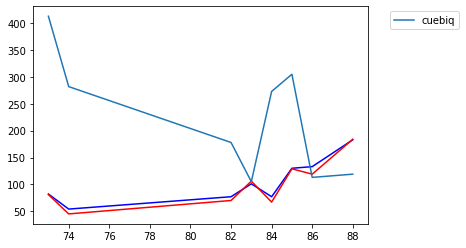

In [105]:
#simulated results
plt.plot(rawdt_new['sim_id_wf'], 'b-')
plt.plot(rawdt_new['sim_id_'],'r-')
plt.plot(rawdt_new['Count_'], label='cuebiq')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [7]:
a = [580.41+485.31+412.06+329.98+291.06+231.42]
sum(a)

2330.2400000000002

In [11]:
import numpy as np
np.log(.2)

-1.6094379124341003

In [3]:
91519+45508+45434+36729

219190